In [53]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
from pathlib import Path

## SFEW

In [56]:
current_dir = Path.cwd()
parent_dir = current_dir.parent
grandparent_dir = parent_dir.parent
csv_dir_path = os.path.join(grandparent_dir, 'Experiment_Output/SFEW')
correct_dfs = []
incorrect_dfs = []

for file in os.listdir(csv_dir_path):
    if file.endswith('checkpoints'):
        shutil.rmtree(os.path.join(csv_dir_path, file))
        
for file in os.listdir(csv_dir_path):
    if os.path.isdir(os.path.join(csv_dir_path, file)):
        continue
    else:
        file_path = os.path.join(csv_dir_path, file)
        if 'incorrect' in file:
            df = pd.read_csv(file_path)
            incorrect_dfs.append(df)
        else:
            df = pd.read_csv(file_path)
            correct_dfs.append(df)

In [57]:
# Start with the first Dataframe
common_rows_correct= correct_dfs[0]

# Iterate over the remaining Dataframes and merge them to find the intersection
for df in correct_dfs[1:]:
    common_rows_correct = pd.merge(common_rows_correct, df, how='inner')

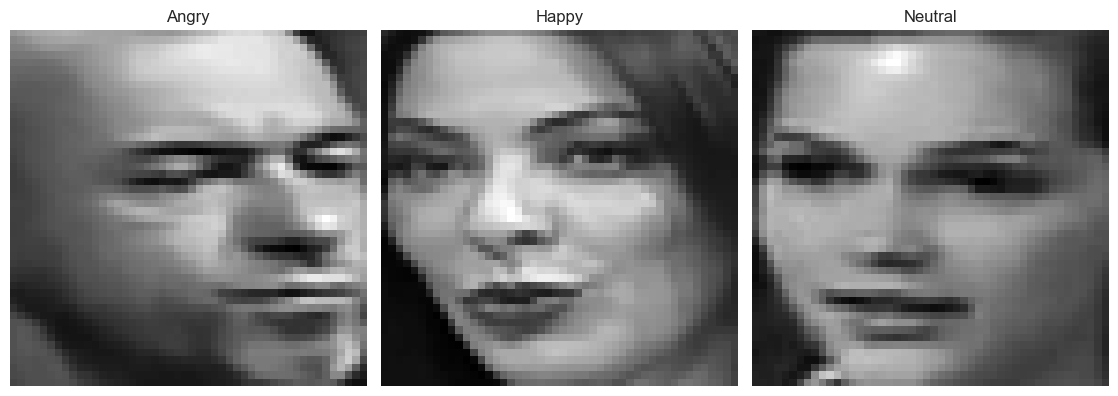

In [58]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Initialize a dictionary to store a sample image path for each emotion
sample_images_correct = {}

# Iterate through the emotions and find one sample image for each
for emotion in emotions:
    # Filter the DataFrame for the current emotion
    emotion_df = common_rows_correct[common_rows_correct['emotion'] == emotion]
    if not emotion_df.empty:
        # Select the first row for this emotion
        sample_images_correct[emotion] = emotion_df.iloc[0]['path']
        
# Plot the images
plt.figure(figsize=(15, 10))
for i, (emotion, img_path) in enumerate(sample_images_correct.items()):
    img = plt.imread(img_path)
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [59]:
common_rows_correct.to_csv(os.path.join(csv_dir_path, 'output/common_correct.csv'), index=False)

In [60]:
# Start with the first Dataframe
common_rows_incorrect = incorrect_dfs[0]

# Iterate over the remaining Dataframes and merge them to find the intersection
for df in incorrect_dfs[1:]:
    common_rows_incorrect = pd.merge(common_rows_incorrect, df, how='inner')

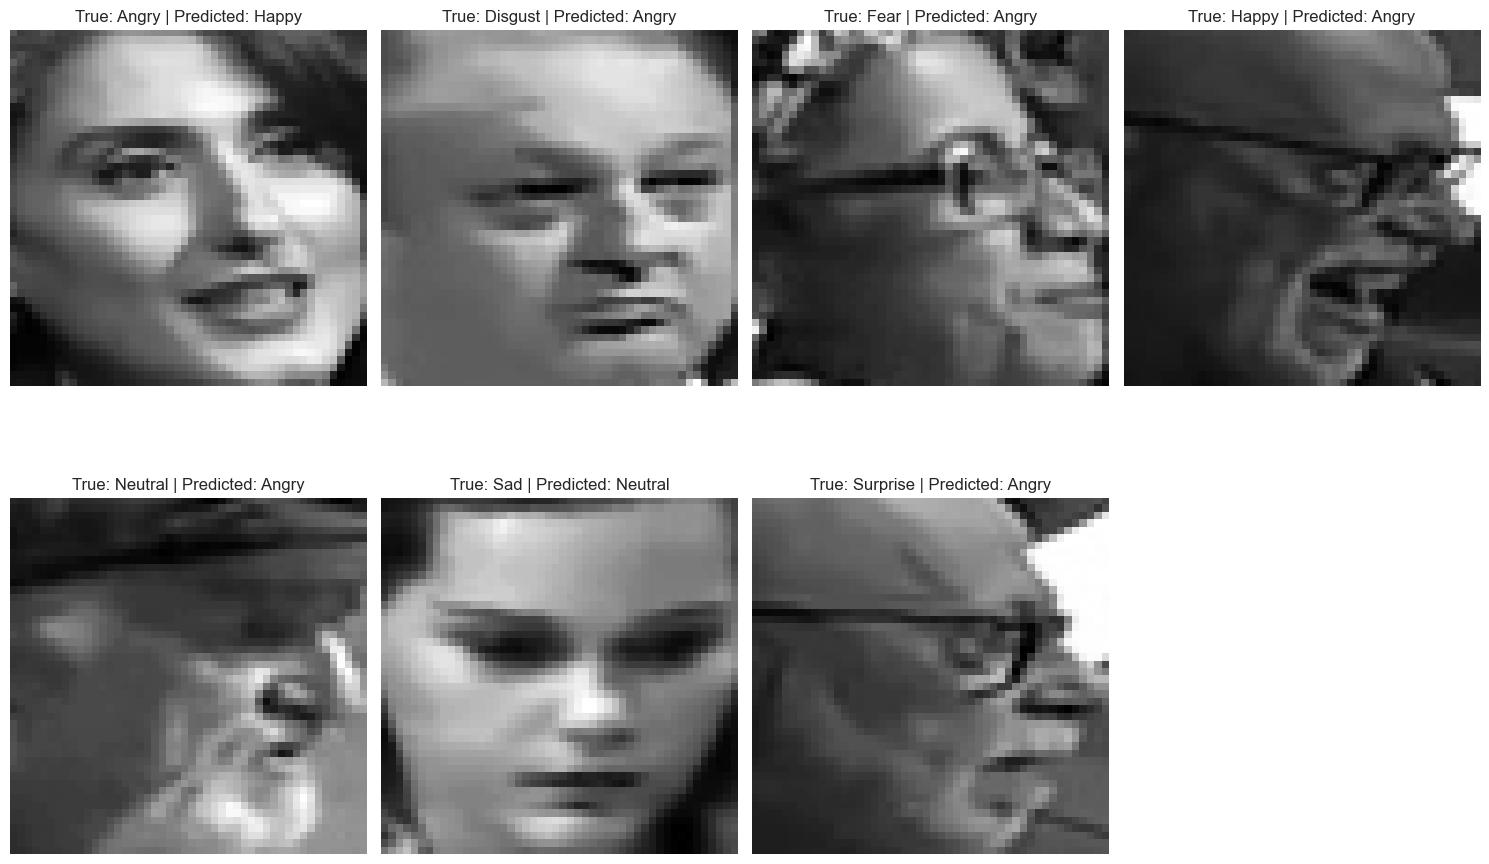

In [61]:
sample_images_incorrect = {}

# Iterate through the emotions and find one sample image for each
for emotion in emotions:
    # Filter the Dataframe for the current emotion
    emotion_df = common_rows_incorrect[common_rows_incorrect['emotion'] == emotion]
    if not emotion_df.empty:
        # Select the first row for this emotion
        sample_images_incorrect[emotion] = (emotion_df.iloc[0]['path'], emotions[emotion_df.iloc[0]['predicted']])
        
plt.figure(figsize=(15, 10))
for i, (emotion, (img_path, prediction)) in enumerate(sample_images_incorrect.items()):
    img = plt.imread(img_path)
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title('True: ' + emotion + ' | Predicted: ' + prediction)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [62]:
common_rows_incorrect.to_csv(os.path.join(csv_dir_path, 'output/common_incorrect.csv'), index=False)

In [63]:
columns = ['path', 'emotion', 'Skin_tone', 'predicted', 'true']
incorrect_df = pd.DataFrame(columns=columns)
correct_df = pd.DataFrame(columns=columns)

for file in os.listdir(csv_dir_path):
    if file.endswith('checkpoints'):
        shutil.rmtree(os.path.join(csv_dir_path, file)) 
        
for file in os.listdir(csv_dir_path):
    if os.path.isdir(os.path.join(csv_dir_path, file)):
        continue
    else:
        file_path = os.path.join(csv_dir_path, file)
        
        if 'incorrect' in file and '%' not in file:
            incorrect_df = pd.read_csv(file_path)
        elif '_correct' in file and '%' in file:
            correct_df = pd.read_csv(file_path)
        else:
            continue

('Angry', ('C:\\Users\\chena\\Desktop\\ResearchProject\\EiLA/Preprocessing/2.Resized_image/EiLA_test\\Angry\\251_label_0_video_Bqb2wT_eP_4_clip_1_person_2.jpg', ('Happy', 'Angry')))
('Happy', ('C:\\Users\\chena\\Desktop\\ResearchProject\\EiLA/Preprocessing/2.Resized_image/EiLA_test\\Happy\\155_label_3_video_aJKL0ahn1Dk_clip_1_person_0.jpg', ('Neutral', 'Happy')))
('Neutral', ('C:\\Users\\chena\\Desktop\\ResearchProject\\EiLA/Preprocessing/2.Resized_image/EiLA_test\\Neutral\\134_label_4_video_aJKL0ahn1Dk_clip_1_person_4.jpg', ('Angry', 'Neutral')))


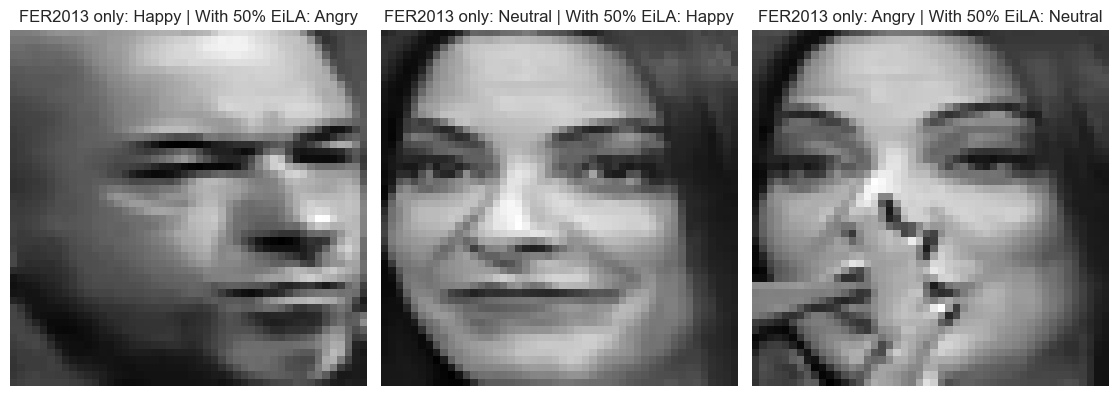

In [64]:
sample_images = {}

# Iterate through the emotions and find one sample image for each
for emotion in emotions:
    # Filter the DataFrame for the current emotion
    incorrect_emotion_df = incorrect_df[incorrect_df['emotion'] == emotion]
    correct_emotion_df = correct_df[correct_df['emotion'] == emotion]
    common_images_df = pd.merge(incorrect_emotion_df, correct_emotion_df, on='path')

    if not common_images_df.empty:
        # Select the first row for this emotion
        sample_images[emotion] = (common_images_df.iloc[0]['path'], (emotions[common_images_df.iloc[0]['predicted_x']], emotions[common_images_df.iloc[0]['predicted_y']]))
            
plt.figure(figsize=(15, 10))
for i, data in enumerate(sample_images.items()):
    print(data)
    path = data[1][0]
    prediction_non_integrated = data[1][1][0]
    prediction_integrated = data[1][1][1]
    img = plt.imread(path)
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title('FER2013 only: ' + prediction_non_integrated + ' | With 50% EiLA: ' + prediction_integrated)
    plt.axis('off')

plt.tight_layout()
plt.show()